# Run logistic regression (without dimensionality reduction)

Reference from: [Logistic Regression for Image Classification](https://medium.com/swlh/logistic-regression-for-image-classification-e15d0ae59ce9)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import seaborn as sns

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_fscore_support

In [3]:
# Note: place archive folder with datasets in the same directory as this notebook file
df_train = pd.read_csv('./archive/fashion-mnist_train.csv')
df_test = pd.read_csv('./archive/fashion-mnist_test.csv')

y_train = df_train['label']
X_train = df_train.iloc[:, 1:]
X_train_scaled = X_train / 255.0
y_test = df_test['label']
X_test = df_test.iloc[:, 1:]
X_test_scaled = X_test / 255.0

## Logistic Regression

In [4]:
clf = LogisticRegression(penalty='none',
                         tol=0.01, solver='saga',
                         multi_class='multinomial').fit(X_train_scaled, y_train)

y_pred = clf.predict(X_test_scaled)

print(precision_recall_fscore_support(y_test, y_pred, average='macro'))
print(precision_recall_fscore_support(y_test, y_pred, average='micro'))
print(precision_recall_fscore_support(y_test, y_pred, average=None))

(0.8537336030157185, 0.8553000000000001, 0.8543297910767788, None)
(0.8553, 0.8553, 0.8553, None)
(array([0.79170685, 0.95870206, 0.77482088, 0.86926148, 0.77724204,
       0.93211753, 0.64565217, 0.90819348, 0.94610778, 0.93353175]), array([0.821, 0.975, 0.757, 0.871, 0.806, 0.92 , 0.594, 0.92 , 0.948,
       0.941]), array([0.80608738, 0.96678235, 0.76580678, 0.87012987, 0.79135984,
       0.92601912, 0.61875   , 0.91405862, 0.94705295, 0.937251  ]), array([1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000],
      dtype=int64))


## Coefficient vectors of each class

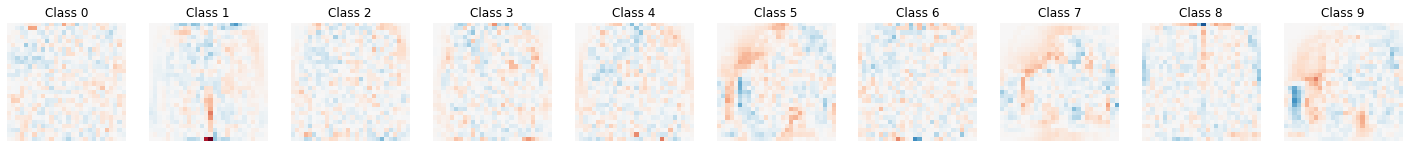

In [5]:
scale = np.max(np.abs(clf.coef_))

p = plt.figure(figsize=(25, 2.5));

for i in range(10):
    p = plt.subplot(1, 10, i + 1)
    p = plt.imshow(clf.coef_[i].reshape(28, 28),
                  cmap=plt.cm.RdBu, vmin=-scale, vmax=scale);
    p = plt.axis('off')
    p = plt.title('Class %i' % i);

# Run logistic regression on t-SNE

In [6]:
from sklearn.manifold import TSNE

## t-SNE visualisation of training data

In [7]:
# Note: May take around > 8 mins. t-SNE plot changes with every run.
# Keep track of time elapsed in the method
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
X_train_scaled_tsne = tsne.fit_transform(X_train_scaled.values)
print('t-SNE finished! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 60000 samples in 0.069s...
[t-SNE] Computed neighbors for 60000 samples in 262.355s...
[t-SNE] Computed conditional probabilities for sample 1000 / 60000
[t-SNE] Computed conditional probabilities for sample 2000 / 60000
[t-SNE] Computed conditional probabilities for sample 3000 / 60000
[t-SNE] Computed conditional probabilities for sample 4000 / 60000
[t-SNE] Computed conditional probabilities for sample 5000 / 60000
[t-SNE] Computed conditional probabilities for sample 6000 / 60000
[t-SNE] Computed conditional probabilities for sample 7000 / 60000
[t-SNE] Computed conditional probabilities for sample 8000 / 60000
[t-SNE] Computed conditional probabilities for sample 9000 / 60000
[t-SNE] Computed conditional probabilities for sample 10000 / 60000
[t-SNE] Computed conditional probabilities for sample 11000 / 60000
[t-SNE] Computed conditional probabilities for sample 12000 / 60000
[t-SNE] Computed conditional probabilities for 

In [8]:
train = pd.DataFrame()

In [9]:
# Create an empty list which will save all meaningful labels
results = []
# Loop through all label
for i in range(y_train.size):
    # Extract the label for comparison
    if y_train[i] == 0:
        # Save meaningful label to the results
        results.append('T-shirt/top')
    # Following the same code pattern as the one above
    elif y_train[i] == 1:
        results.append('Trouser')
    elif y_train[i] == 2:
        results.append('Pullover')
    elif y_train[i] == 3:
        results.append('Dress')
    elif y_train[i] == 4:
        results.append('Coat')
    elif y_train[i] == 5:
        results.append('Sandal')
    elif y_train[i] == 6:
        results.append('Shirt')
    elif y_train[i] == 7:
        results.append('Sneaker')
    elif y_train[i] == 8:
        results.append('Bag')
    elif y_train[i] == 9:
        results.append('Ankle boot')
    else:
        print("The dataset contains an unexpected label {}".format(y_train[i]))

# Create a new column named result which has all meaningful results        
train['result'] = results

<AxesSubplot:xlabel='t-SNE First Dimension', ylabel='t-SNE Second Dimension'>

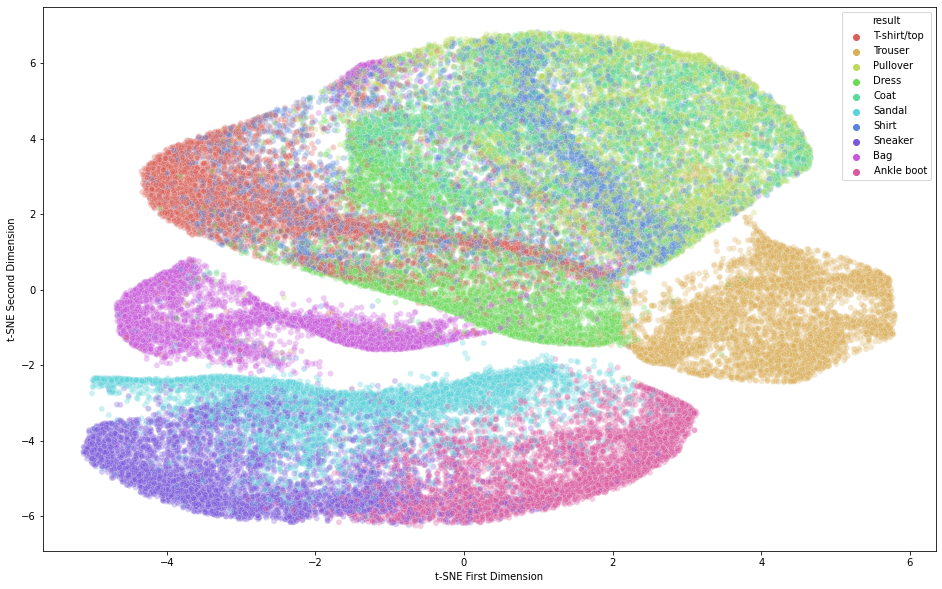

In [10]:
train['t-SNE First Dimension'] = X_train_scaled_tsne[:,0]
train['t-SNE Second Dimension'] = X_train_scaled_tsne[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="t-SNE First Dimension", y="t-SNE Second Dimension",
    hue="result",
    hue_order = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'],
    palette=sns.color_palette("hls", 10),
    data=train,
    legend="full",
    alpha=0.3
)

## t-SNE visualisation of test data

In [11]:
# Keep track of time elapsed in the method
time_start = time.time()
X_test_scaled_tsne = tsne.fit_transform(X_test_scaled.values)
print('t-SNE finished! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.016s...
[t-SNE] Computed neighbors for 10000 samples in 6.391s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 1.786803
[t-SNE] KL divergence after 250 iterations with early exaggeration: 76.592590
[t-SNE] KL divergence after 300 iterations: 2.508368
t-SNE finished! Time elap

In [12]:
test = pd.DataFrame()

In [13]:
# Create an empty list which will save all meaningful labels
results = []
# Loop through all label
for i in range(y_test.size):
    # Extract the label for comparison
    if y_test[i] == 0:
        # Save meaningful label to the results
        results.append('T-shirt/top')
    # Following the same code pattern as the one above
    elif y_test[i] == 1:
        results.append('Trouser')
    elif y_test[i] == 2:
        results.append('Pullover')
    elif y_test[i] == 3:
        results.append('Dress')
    elif y_test[i] == 4:
        results.append('Coat')
    elif y_test[i] == 5:
        results.append('Sandal')
    elif y_test[i] == 6:
        results.append('Shirt')
    elif y_test[i] == 7:
        results.append('Sneaker')
    elif y_test[i] == 8:
        results.append('Bag')
    elif y_test[i] == 9:
        results.append('Ankle boot')
    else:
        print("The dataset contains an unexpected label {}".format(y_test[i]))

# Create a new column named result which has all meaningful results        
test['result'] = results

<AxesSubplot:xlabel='t-SNE First Dimension', ylabel='t-SNE Second Dimension'>

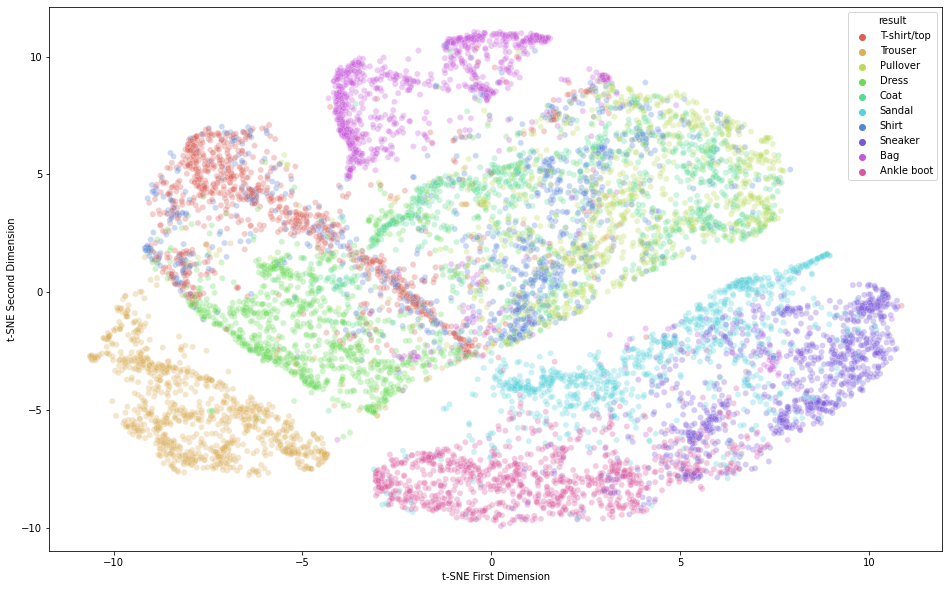

In [14]:
test['t-SNE First Dimension'] = X_test_scaled_tsne[:,0]
test['t-SNE Second Dimension'] = X_test_scaled_tsne[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="t-SNE First Dimension", y="t-SNE Second Dimension",
    hue="result",
    hue_order = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'],
    palette=sns.color_palette("hls", 10),
    data=test,
    legend="full",
    alpha=0.3
)

## Logistic Regression

In [15]:
clf = LogisticRegression(penalty='none',
                         tol=0.01, solver='saga',
                         multi_class='multinomial').fit(train.iloc[:,1:3], y_train)

y_pred = clf.predict(test.iloc[:,1:3])

print(precision_recall_fscore_support(y_test, y_pred, average='macro'))
print(precision_recall_fscore_support(y_test, y_pred, average='micro'))
print(precision_recall_fscore_support(y_test, y_pred, average=None))

(0.17720295839161343, 0.21319999999999997, 0.18513238254708003, None)
(0.2132, 0.2132, 0.2132, None)
(array([0.48620961, 0.        , 0.40223464, 0.04794521, 0.13137755,
       0.06046512, 0.17732558, 0.00076923, 0.01794145, 0.44776119]), array([0.617, 0.   , 0.504, 0.021, 0.103, 0.026, 0.061, 0.001, 0.019,
       0.78 ]), array([0.54385192, 0.        , 0.44740346, 0.02920723, 0.11547085,
       0.03636364, 0.09077381, 0.00086957, 0.01845556, 0.56892779]), array([1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000],
      dtype=int64))


# Run logistic regression on PCA

In [16]:
from sklearn.decomposition import PCA

In [17]:
# Set first three principle components
pca = PCA(n_components=3)
# Fit the model with pixel columns and apply the dimensionality reduction on those columns
X_train_scaled_pca = pca.fit_transform(X_train_scaled.values)
X_test_scaled_pca = pca.fit_transform(X_test_scaled.values)

## PCA visualisation of training data

In [18]:
train = pd.DataFrame()

In [19]:
# Create an empty list which will save all meaningful labels
results = []
# Loop through all label
for i in range(y_train.size):
    # Extract the label for comparison
    if y_train[i] == 0:
        # Save meaningful label to the results
        results.append('T-shirt/top')
    # Following the same code pattern as the one above
    elif y_train[i] == 1:
        results.append('Trouser')
    elif y_train[i] == 2:
        results.append('Pullover')
    elif y_train[i] == 3:
        results.append('Dress')
    elif y_train[i] == 4:
        results.append('Coat')
    elif y_train[i] == 5:
        results.append('Sandal')
    elif y_train[i] == 6:
        results.append('Shirt')
    elif y_train[i] == 7:
        results.append('Sneaker')
    elif y_train[i] == 8:
        results.append('Bag')
    elif y_train[i] == 9:
        results.append('Ankle boot')
    else:
        print("The dataset contains an unexpected label {}".format(y_train[i]))

# Create a new column named result which has all meaningful results        
train['result'] = results

In [20]:
train['First Dimension'] = X_train_scaled_pca[:,0]
train['Second Dimension'] = X_train_scaled_pca[:,1]
train['Third Dimension'] = X_train_scaled_pca[:,2]

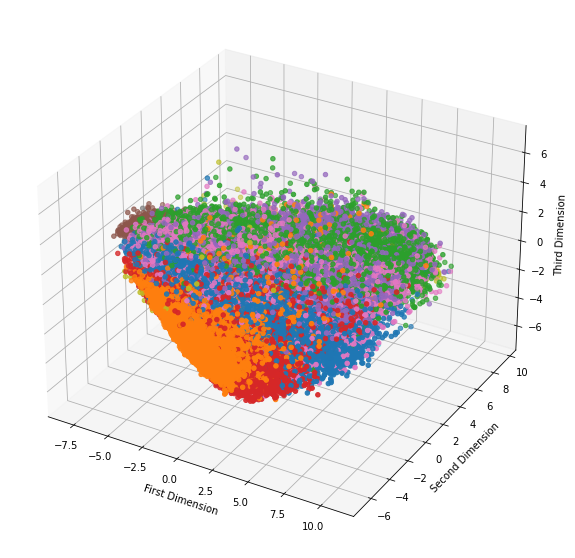

In [21]:
graph = plt.figure(figsize=(16,10)).gca(projection='3d')
graph.scatter(
    xs=train["First Dimension"], 
    ys=train["Second Dimension"], 
    zs=train["Third Dimension"], 
    c=y_train, 
    cmap='tab10'
)
graph.set_xlabel('First Dimension')
graph.set_ylabel('Second Dimension')
graph.set_zlabel('Third Dimension')
plt.show()

## PCA visualisation of test data

In [22]:
test = pd.DataFrame()

In [23]:
# Create an empty list which will save all meaningful labels
results = []
# Loop through all label
for i in range(y_test.size):
    # Extract the label for comparison
    if y_test[i] == 0:
        # Save meaningful label to the results
        results.append('T-shirt/top')
    # Following the same code pattern as the one above
    elif y_test[i] == 1:
        results.append('Trouser')
    elif y_test[i] == 2:
        results.append('Pullover')
    elif y_test[i] == 3:
        results.append('Dress')
    elif y_test[i] == 4:
        results.append('Coat')
    elif y_test[i] == 5:
        results.append('Sandal')
    elif y_test[i] == 6:
        results.append('Shirt')
    elif y_test[i] == 7:
        results.append('Sneaker')
    elif y_test[i] == 8:
        results.append('Bag')
    elif y_test[i] == 9:
        results.append('Ankle boot')
    else:
        print("The dataset contains an unexpected label {}".format(y_test[i]))

# Create a new column named result which has all meaningful results        
test['result'] = results

In [24]:
test['First Dimension'] = X_test_scaled_pca[:,0]
test['Second Dimension'] = X_test_scaled_pca[:,1]
test['Third Dimension'] = X_test_scaled_pca[:,2]

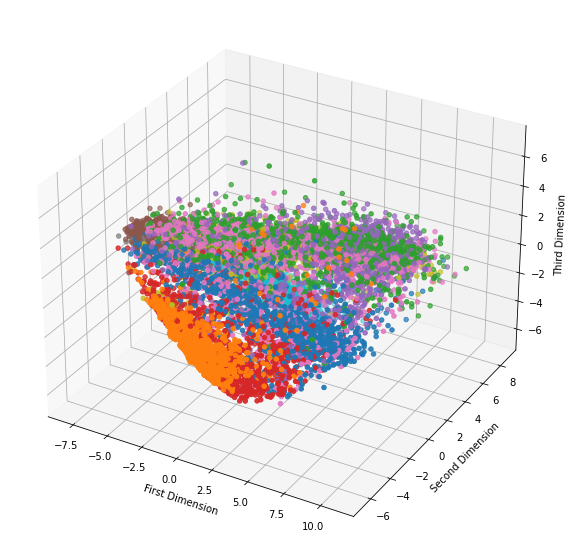

In [25]:
graph = plt.figure(figsize=(16,10)).gca(projection='3d')
graph.scatter(
    xs=test["First Dimension"], 
    ys=test["Second Dimension"], 
    zs=test["Third Dimension"], 
    c=y_test, 
    cmap='tab10'
)
graph.set_xlabel('First Dimension')
graph.set_ylabel('Second Dimension')
graph.set_zlabel('Third Dimension')
plt.show()

## Logistic Regression

In [26]:
clf = LogisticRegression(penalty='none',
                         tol=0.1, solver='saga',
                         multi_class='multinomial').fit(X_train_scaled_pca, y_train)

y_pred = clf.predict(X_test_scaled_pca)

print(precision_recall_fscore_support(y_test, y_pred, average='macro'))
print(precision_recall_fscore_support(y_test, y_pred, average='micro'))
print(precision_recall_fscore_support(y_test, y_pred, average=None))

(0.5972111358281665, 0.6033999999999999, 0.5949888587839443, None)
(0.6034, 0.6034, 0.6034, None)
(array([0.54029605, 0.79253867, 0.43018213, 0.6513089 , 0.3380117 ,
       0.67144907, 0.34934498, 0.55327245, 0.80736544, 0.83834197]), array([0.657, 0.871, 0.496, 0.622, 0.289, 0.468, 0.24 , 0.727, 0.855,
       0.809]), array([0.59296029, 0.82991901, 0.46075244, 0.63631714, 0.3115903 ,
       0.55156158, 0.28452875, 0.62834918, 0.83050024, 0.82340967]), array([1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000],
      dtype=int64))


# Run logistic regression on LDA

In [27]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [28]:
lda = LinearDiscriminantAnalysis(n_components=3)
X_train_scaled_lda = lda.fit_transform(X_train_scaled.values, y_train)
X_test_scaled_lda = lda.fit_transform(X_test_scaled.values, y_test)

## LDA visualisation of training data

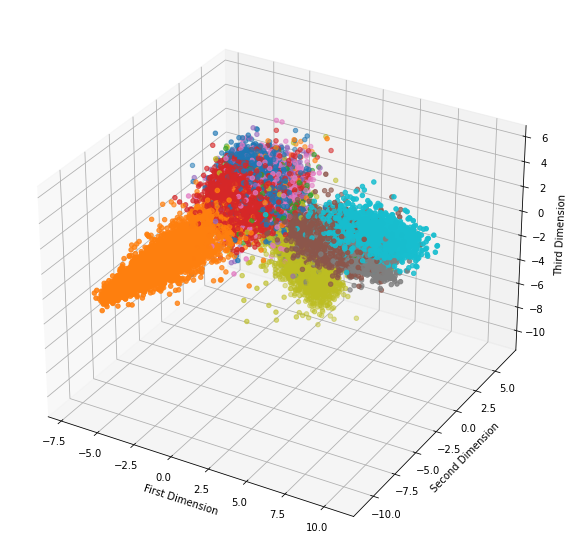

In [29]:
X_train_scaled_lda_df = pd.DataFrame(X_train_scaled_lda)

graph = plt.figure(figsize=(16,10)).gca(projection='3d')
graph.scatter(
    xs=X_train_scaled_lda_df[0], 
    ys=X_train_scaled_lda_df[1], 
    zs=X_train_scaled_lda_df[2], 
    c=y_train, 
    cmap='tab10'
)
graph.set_xlabel('First Dimension')
graph.set_ylabel('Second Dimension')
graph.set_zlabel('Third Dimension')
plt.show()

## LDA visualisation of test data

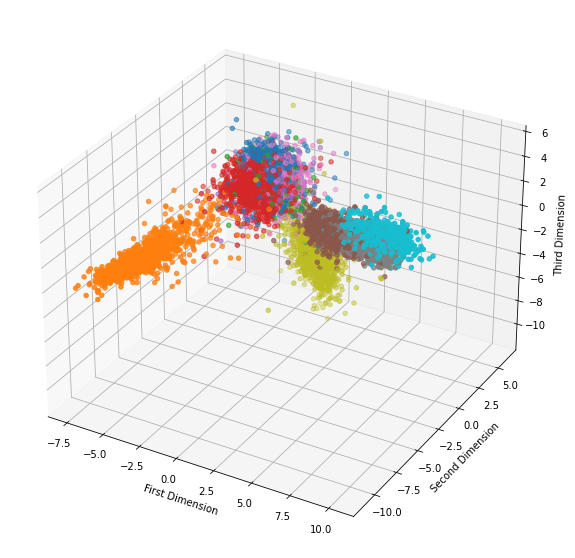

In [30]:
X_test_scaled_lda_df = pd.DataFrame(X_test_scaled_lda)

graph = plt.figure(figsize=(16,10)).gca(projection='3d')
graph.scatter(
    xs=X_test_scaled_lda_df[0], 
    ys=X_test_scaled_lda_df[1], 
    zs=X_test_scaled_lda_df[2], 
    c=y_test, 
    cmap='tab10'
)
graph.set_xlabel('First Dimension')
graph.set_ylabel('Second Dimension')
graph.set_zlabel('Third Dimension')
plt.show()

## Logistic Regression

In [31]:
clf = LogisticRegression(penalty='none',
                         tol=0.1, solver='saga',
                         multi_class='multinomial').fit(X_train_scaled_lda, y_train)

y_pred = clf.predict(X_test_scaled_lda)

print(precision_recall_fscore_support(y_test, y_pred, average='macro'))
print(precision_recall_fscore_support(y_test, y_pred, average='micro'))
print(precision_recall_fscore_support(y_test, y_pred, average=None))

(0.656423819990539, 0.6471, 0.6481589050275485, None)
(0.6471, 0.6471, 0.6471, None)
(array([0.49860465, 0.98478702, 0.34659091, 0.69001148, 0.4857997 ,
       0.82387707, 0.35348125, 0.63881636, 0.93871595, 0.8035538 ]), array([0.536, 0.971, 0.366, 0.601, 0.325, 0.697, 0.462, 0.734, 0.965,
       0.814]), array([0.51662651, 0.97784491, 0.35603113, 0.6424372 , 0.38945476,
       0.75514626, 0.40052016, 0.68310842, 0.95167653, 0.80874317]), array([1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000],
      dtype=int64))


# Conclusion

From the above tests:
1. Logistic regression runs best on this dataset without applying the dimensionality reduction methods used
2. Among t-SNE, PCA and LDA, logistic regression runs best after running LDA (LDA best separates the class in a predictable manner?)